In [2]:
import numpy as np
import pandas as pd
from icecream import ic
from matplotlib import pyplot as plt
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error

from xgboost import XGBRegressor

import datetime

# DATA 607 - Machine Learning

## Class 7 &mdash; 2025.05.14 &mdash; Time series

### Preprocessing

- Convert to parquet format, which is smaller and can remember column dtypes.

  ```python
  df = pd.read_csv(
      "~/.kaggle/data/rossmann-store-sales/train.csv",
      dtype={
          "Store": "category",
          "DayOfWeek": "category",
          "Open": bool,
          "Promo": bool,
          "StateHoliday": "category",
          "SchoolHoliday": bool,
      },
      parse_dates=["Date"],
  )

  df.to_parquet("data/rossmann_train.parquet", index=False)
  ```

In [4]:
df = pd.read_parquet("data/rossmann_train.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844338 non-null  int64         
 1   DayOfWeek      844338 non-null  int64         
 2   Date           844338 non-null  datetime64[ns]
 3   Sales          844338 non-null  float64       
 4   Promo          844338 non-null  bool          
 5   StateHoliday   844338 non-null  int64         
 6   SchoolHoliday  844338 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3)
memory usage: 33.8 MB


In [233]:
positive_sales = df["Sales"] > 0
cutoff = pd.to_datetime(datetime.date(2015, 1, 1))
train_mask = positive_sales & (df["Date"] < cutoff)
val_mask = positive_sales & (df["Date"] >= cutoff)

y_train = df[train_mask]["Sales"]
y_val = df[val_mask]["Sales"]

In [5]:
column_transformer = ColumnTransformer(
    transformers=[
        (
            "categorical",
            OneHotEncoder(drop="first"),
            ["Store", "DayOfWeek", "StateHoliday"],
        ),
        ("binary", "passthrough", ["Promo", "SchoolHoliday"]),
    ],
    remainder="drop",
    verbose_feature_names_out=False,
)

In [6]:
positive_sales = df["Sales"] > 0
cutoff = pd.to_datetime(datetime.date(2015, 1, 1))
train_mask = positive_sales & (df["Date"] < cutoff)
val_mask = positive_sales & (df["Date"] >= cutoff)

y_train = df[train_mask]["Sales"]
y_val = df[val_mask]["Sales"]

X_train = column_transformer.fit_transform(df[train_mask])
X_val = column_transformer.transform(df[val_mask])

ic(X_train.shape, X_val.shape)

ic| X_train.shape: (648309, 1125), X_val.shape: (196029, 1125)


((648309, 1125), (196029, 1125))

In [7]:
len(column_transformer.get_feature_names_out())

1125

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(y_val, model.predict(X_val)))

0.16300109051688788


In [9]:
model = XGBRegressor(learning_rate=0.9, max_depth=35, n_estimators=100)
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(y_val, model.predict(X_val)))

0.11294578808319317


In [ ]:
feature_names = column_transformer.get_feature_names_out()
store_features = [i for i, c in enumerate(feature_names) if c.startswith("Store_")]
day_features = [i for i, c in enumerate(feature_names) if c.startswith("DayOfWeek_")]
holiday_features = [
    i for i, c in enumerate(feature_names) if c.startswith("StateHoliday_")
]
len(store_features)

1114

In [262]:
df[train_mask]

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
236380,1,3,2014-12-31,2605,True,False,0,True
236381,2,3,2014-12-31,2269,True,False,0,True
236382,3,3,2014-12-31,3804,True,False,0,True
236383,4,3,2014-12-31,10152,True,False,0,True
236384,5,3,2014-12-31,1830,True,False,0,True
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,True,False,a,True
1016827,733,2,2013-01-01,10765,True,False,a,True
1016863,769,2,2013-01-01,5035,True,False,a,True
1017042,948,2,2013-01-01,4491,True,False,a,True


In [273]:
model.feature_importances_[-2:]

array([1.5106157e-04, 3.3980605e-06], dtype=float32)

In [264]:
[f.split("_")[1] for f in feature_names[:1114]]

['10',
 '100',
 '1000',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '101',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '102',
 '1020',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1029',
 '103',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1038',
 '1039',
 '104',
 '1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '105',
 '1050',
 '1051',
 '1052',
 '1053',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '106',
 '1060',
 '1061',
 '1062',
 '1063',
 '1064',
 '1065',
 '1066',
 '1067',
 '1068',
 '1069',
 '107',
 '1070',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '108',
 '1080',
 '1081',
 '1082',
 '1083',
 '1084',
 '1085',
 '1086',
 '1087',
 '1088',
 '1089',
 '109',
 '1090',
 '1091',
 '1092',
 '1093',
 '1094',
 '1095',
 '1096',
 '1097',
 '1098',
 '1099',
 '11',
 '110'

In [204]:
df = pd.read_parquet("data/rossmann_train.parquet")
df.drop(columns=["Date", "Customers", "Open"], inplace=True)

In [205]:
for c in ["Store", "DayOfWeek", "StateHoliday"]:
    df[c] = (
        df[c]
        .map(df[train_mask].groupby(c, observed=False)["Sales"].agg("mean"))
        .astype(float)
    )
df

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday
0,4825.986799,7061.340863,5263,True,6914.222231,True
1,4941.769737,7061.340863,6064,True,6914.222231,True
2,6955.652318,7061.340863,8314,True,6914.222231,True
3,9580.026316,7061.340863,13995,True,6914.222231,True
4,4687.716418,7061.340863,4822,True,6914.222231,True
...,...,...,...,...,...,...
1017204,5351.336093,7034.505260,0,False,8257.532934,True
1017205,10530.240066,7034.505260,0,False,8257.532934,True
1017206,6631.800987,7034.505260,0,False,8257.532934,True
1017207,20384.062500,7034.505260,0,False,8257.532934,True


In [206]:
y_train = df[train_mask]["Sales"]
y_val = df[val_mask]["Sales"]

X_train = df.drop(columns=["Sales"])[train_mask]
X_val = df.drop(columns=["Sales"])[val_mask]

ic(X_train.shape, X_val.shape)

ic| X_train.shape: (648309, 5), X_val.shape: (196029, 5)


((648309, 5), (196029, 5))

In [207]:
model = LinearRegression()
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(y_val, model.predict(X_val)))

0.1604666949005005


In [208]:
model = XGBRegressor(learning_rate=0.1, n_estimators=7000)
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(y_val, model.predict(X_val)))

0.13922111690044403


<BarContainer object of 5 artists>

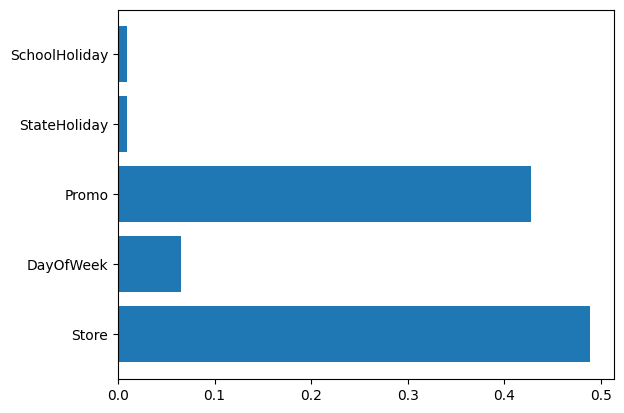

In [209]:
plt.barh(model.feature_names_in_, model.feature_importances_)

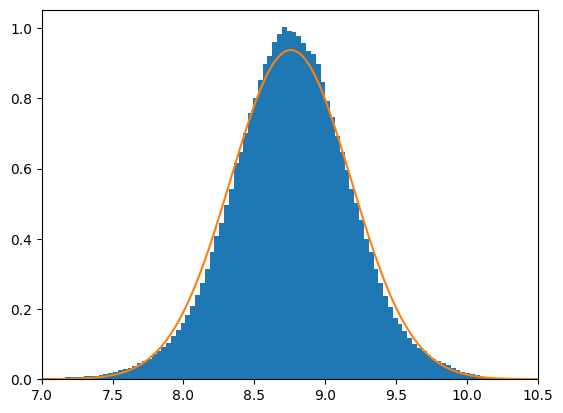

In [ ]:
import scipy.stats as stats

logsales = np.log(df["Sales"][df["Sales"] != 0])

plt.hist(logsales, bins=200, density=True)
plt.xlim(7, 10.5)
u = np.linspace(7, 10.5, 200)
plt.plot(u, stats.norm(logsales.mean(), logsales.std()).pdf(u))

In [210]:
df = pd.read_parquet("data/rossmann_train.parquet")
df = df.drop(columns=["Customers", "Open"])

positive_sales = df["Sales"] > 0
df = df[positive_sales]
df["Sales"] = np.log(df["Sales"])

In [ ]:
cutoff = pd.to_datetime(datetime.date(2015, 1, 1))
train_mask = df["Date"] < cutoff
val_mask = df["Date"] >= cutoff

for c in ["Store", "DayOfWeek", "StateHoliday"]:
    df[c] = (
        df[c]
        .map(df[train_mask].groupby(c, observed=False)["Sales"].agg("mean"))
        .astype(float)
    )

y_train = df[train_mask]["Sales"]
y_val = df[val_mask]["Sales"]

X_train = df.drop(columns=["Sales", "Date"])[train_mask]
X_val = df.drop(columns=["Sales", "Date"])[val_mask]

ic(X_train.shape, X_val.shape)

ic| X_train.shape: (648309, 5), X_val.shape: (196029, 5)


In [212]:
X_train

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday
236380,8.459317,8.728051,False,8.749906,True
236381,8.449609,8.728051,False,8.749906,True
236382,8.795101,8.728051,False,8.749906,True
236383,9.147825,8.728051,False,8.749906,True
236384,8.368869,8.728051,False,8.749906,True
...,...,...,...,...,...
1016776,9.269316,8.772672,False,8.807584,True
1016827,9.597358,8.772672,False,8.807584,True
1016863,9.239538,8.772672,False,8.807584,True
1017042,8.765829,8.772672,False,8.807584,True


In [213]:
model = LinearRegression()
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(np.exp(y_val), np.exp(model.predict(X_val))))

0.15279591823497754


In [214]:
model = XGBRegressor(learning_rate=0.1, n_estimators=7000)
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(np.exp(y_val), np.exp(model.predict(X_val))))

0.1368333230250972


In [ ]:
def root_mean_squared_percentage_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2 / y_true**2))

In [216]:
print(root_mean_squared_percentage_error(np.exp(y_val), np.exp(model.predict(X_val))))

0.2066315430010533


<BarContainer object of 5 artists>

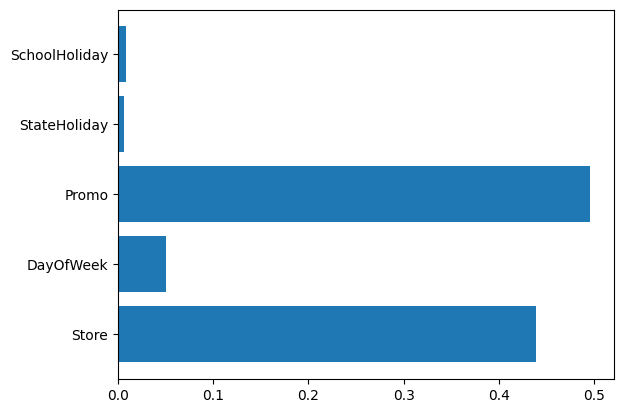

In [ ]:
plt.barh(model.feature_names_in_, model.feature_importances_)

In [2]:
df = pd.read_parquet("data/rossmann_train.parquet")
df = df.drop(columns=["Customers", "Open"])

positive_sales = df["Sales"] > 0
df = df[positive_sales]

In [ ]:
cutoff = pd.to_datetime(datetime.date(2015, 1, 1))
train_mask = df["Date"] < cutoff
val_mask = df["Date"] >= cutoff

y_train = df[train_mask]["Sales"]
y_val = df[val_mask]["Sales"]

X = pd.get_dummies(df["Store"]).astype(float)
y = df["Sales"]

X_train = X[train_mask]
X_val = X[val_mask]

y_train = y[train_mask]
y_val = y[val_mask]

ic(X_train.shape, X_val.shape)

ic| X_train.shape: (648309, 1115), X_val.shape: (196029, 1115)


In [19]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1, fit_intercept=False)
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(y_val, model.predict(X_val)))

0.22083877763512688


In [12]:
model = XGBRegressor(learning_rate=0.9, n_estimators=1000)
model.fit(X_train, y_train)
print(mean_absolute_percentage_error(y_val, model.predict(X_val)))

0.22087283432483673


In [18]:
sum(X_train.loc[:, "1"])

606.0

In [23]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

model.coef_

array([4825.98679868, 5494.75328947, 7857.16666667, ..., 5175.07920792,
       4262.16086235, 9183.63245033], shape=(1115,))

In [21]:
df[train_mask].groupby("Store", observed=False)["Sales"].agg("mean")

Store
1       4825.986799
10      5494.753289
100     7857.166667
1000    7491.714286
1001    5299.166667
           ...     
995     9150.554636
996     6320.284264
997     5175.079208
998     4262.160862
999     9183.632450
Name: Sales, Length: 1115, dtype: float64